In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

In [3]:
def showImage(img):
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    plt.imshow(img)

    plt.show()

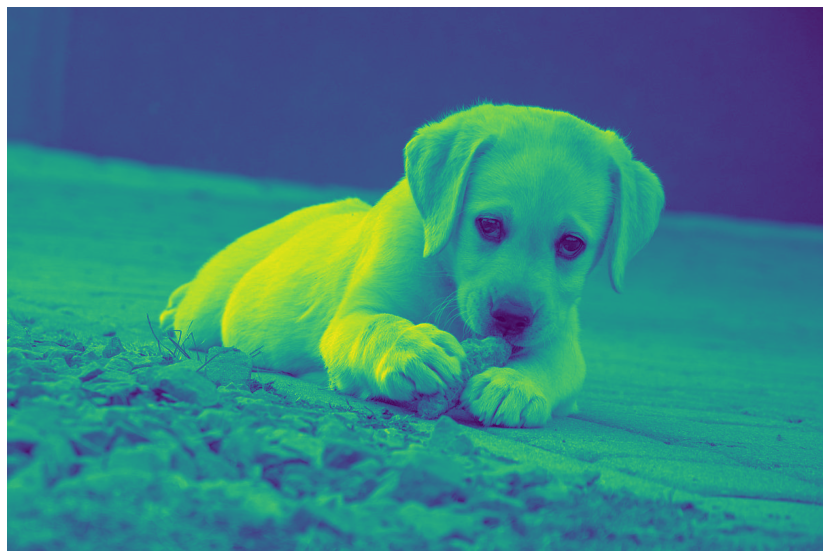

In [5]:
img1 = cv.imread('sobaka.jpg', cv.IMREAD_GRAYSCALE)
showImage(img1)

In [6]:
def hamming_distance(d1, d2):
    if len(d1) != len(d2):
        return -1
    return sum(el1 != el2 for el1, el2 in zip(d1, d2)) / len(d1)

In [23]:
def custom_match(img1, img2):
    star = cv.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp1 = star.detect(img1,None)
    kp2 = star.detect(img2,None)
    # compute the descriptors with BRIEF
    kp1, des1 = brief.compute(img1, kp1)
    kp2, des2 = brief.compute(img2, kp2)
    print(len(des1))
    print(len(des2))
    matches = []
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            matches.append(cv.DMatch(_queryIdx=i, _trainIdx=j,  _distance=hamming_distance(d1,d2), _imgIdx=0))
        
    matches = sorted(matches, key=lambda x: x.distance)
    
 

    showImage(cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2))   

In [19]:
def bf_match(img1, img2):
    star = cv.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp1 = star.detect(img1,None)
    kp2 = star.detect(img2,None)
    # compute the descriptors with BRIEF
    kp1, des1 = brief.compute(img1, kp1)
    kp2, des2 = brief.compute(img2, kp2)

    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance)

    showImage(cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2))
    

In [20]:
imag1 = cv.rotate(img1, cv.ROTATE_90_CLOCKWISE)

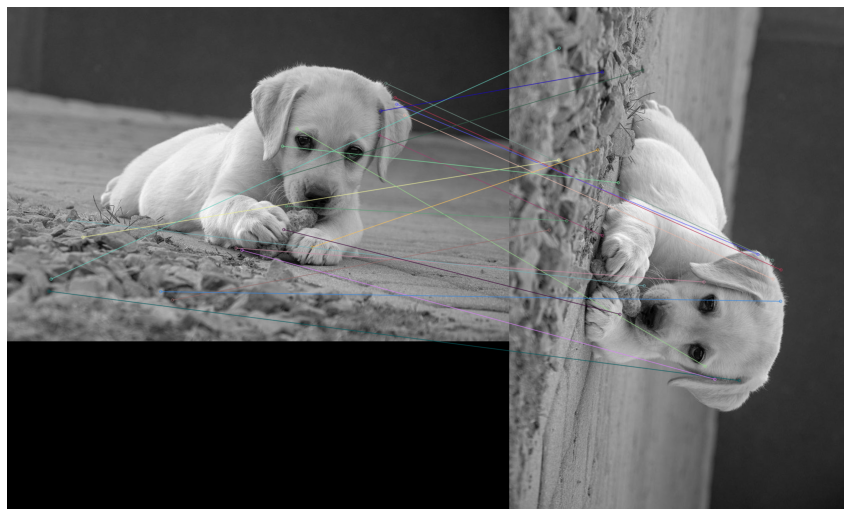

In [21]:
bf_match(img1,imag1)

277
277


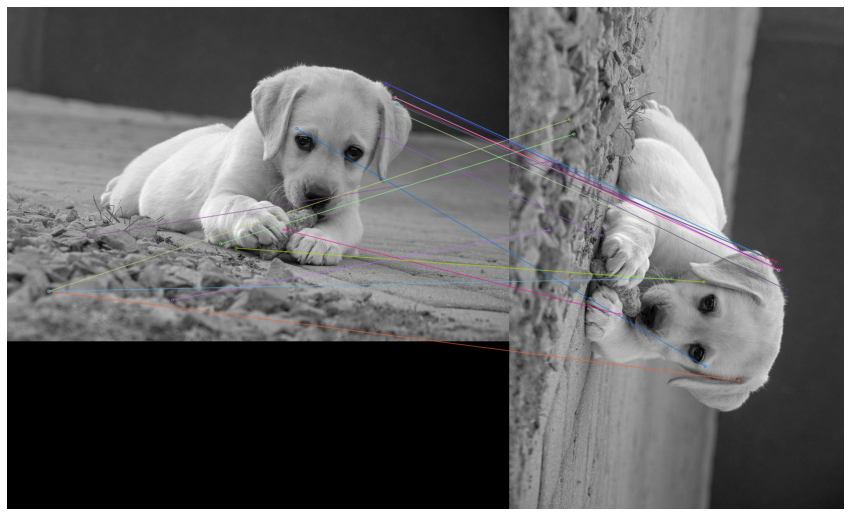

In [24]:
custom_match(img1,imag1)